In [1]:
import pandas as pd
df = pd.read_excel('/content/US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
print("Latest time frame: " ,max(df['Order Date']))
print("Earliest time frame: " ,min(df['Order Date']))

Latest time frame:  2017-12-30 00:00:00
Earliest time frame:  2014-01-03 00:00:00


In [3]:
time_diff = df['Order Date'].diff()
if all(time_diff == time_diff[0]):
    print("Data is equally spaced.")
else:
    print("Data is not equally spaced.")

Data is not equally spaced.


In [4]:
by_category = df.groupby(['Category','Order Date']).sum("Sales").reset_index()
by_category

,Category,Order Date,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,Furniture,2014-01-06,7475,42420,2573.820,9,0.00,746.4078
1,Furniture,2014-01-07,7661,77340,76.728,3,0.60,-53.7096
2,Furniture,2014-01-10,867,22153,51.940,1,0.00,21.2954
3,Furniture,2014-01-11,717,19901,9.940,2,0.00,3.0814
4,Furniture,2014-01-13,7918,123573,879.939,9,0.15,91.2798
...,...,...,...,...,...,...,...,...
2856,Technology,2017-12-25,25684,120853,401.208,14,0.70,71.7174
2857,Technology,2017-12-27,2570,43055,164.388,2,0.40,-35.6174
2858,Technology,2017-12-28,574,10024,14.850,3,0.00,4.0095
2859,Technology,2017-12-29,1879,90049,302.376,3,0.20,22.6782


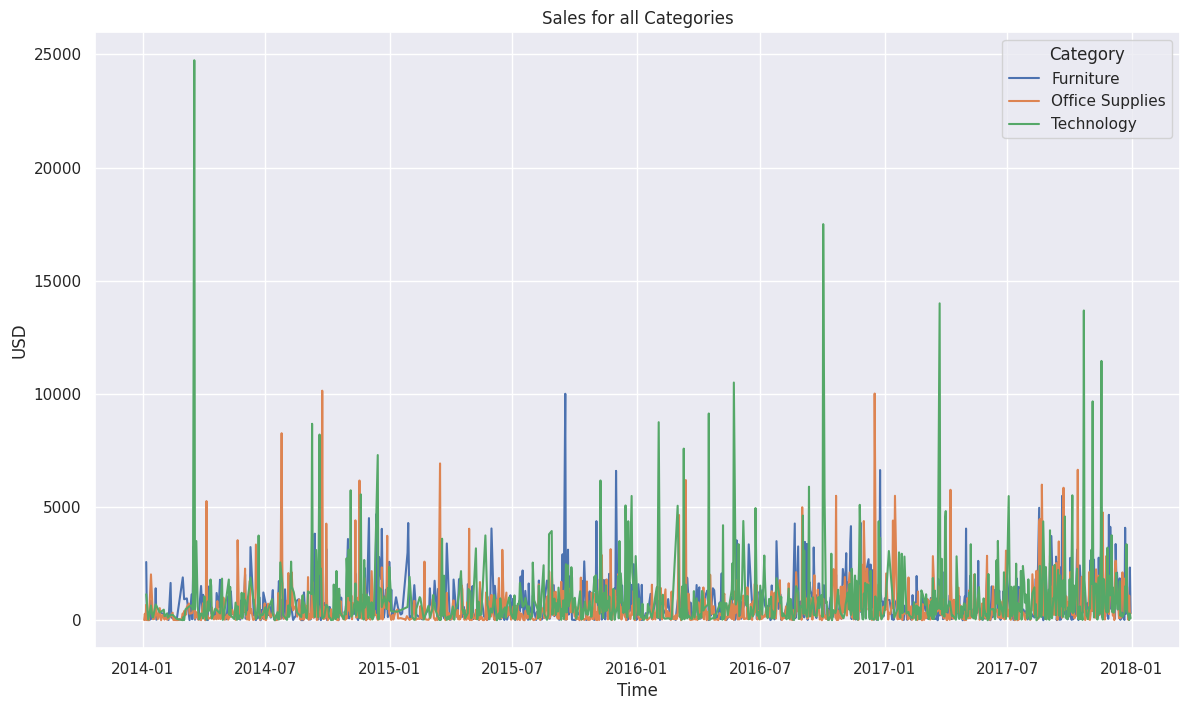

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.lineplot(data=by_category, x ='Order Date', y = 'Sales',
                hue='Category',legend='full')
plt.ylabel('USD')
plt.xlabel('Time')
plt.title('Sales for all Categories')
plt.show()

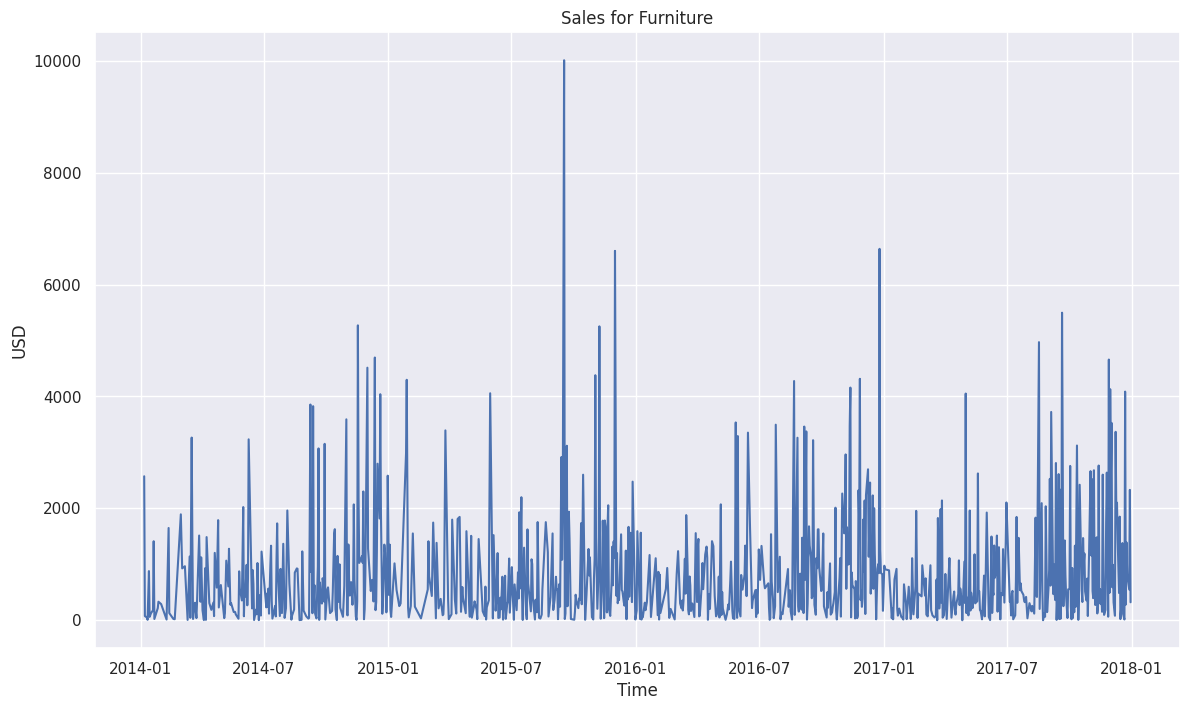

In [6]:
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.lineplot(data=by_category[by_category["Category"]=="Furniture"], x ='Order Date', y = 'Sales')
plt.ylabel('USD')
plt.xlabel('Time')
plt.title('Sales for Furniture')
plt.show()

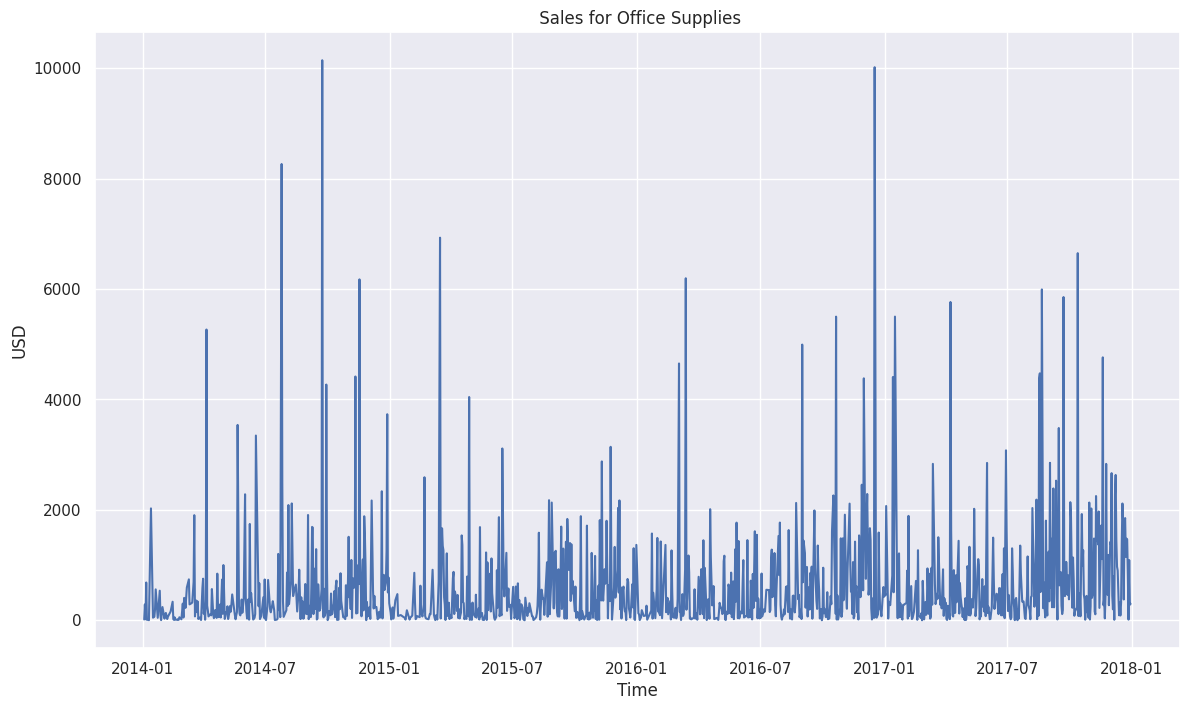

In [7]:
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.lineplot(data=by_category[by_category["Category"]=="Office Supplies"], x ='Order Date', y = 'Sales')
plt.ylabel('USD')
plt.xlabel('Time')
plt.title(' Sales for Office Supplies')
plt.show()

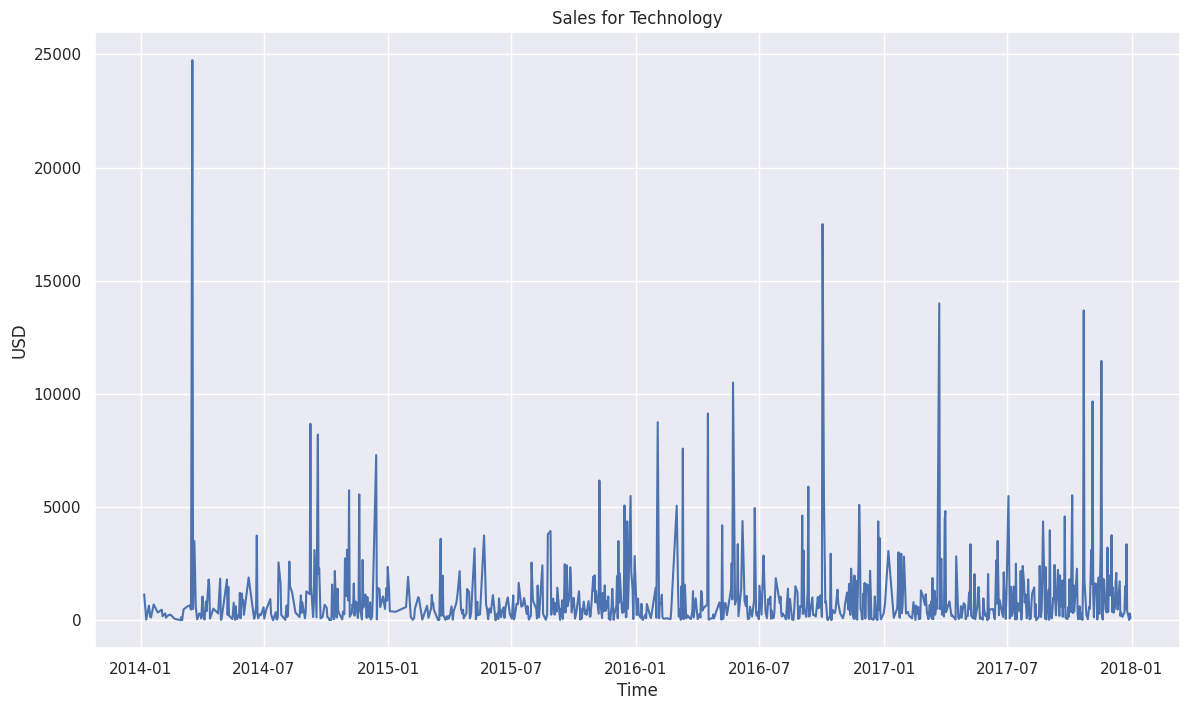

In [8]:
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.lineplot(data=by_category[by_category["Category"]=="Technology"], x ='Order Date', y = 'Sales')
plt.ylabel('USD')
plt.xlabel('Time')
plt.title('Sales for Technology')
plt.show()

In [9]:
by_product = df.groupby(['Product Name','Order Date']).sum("Sales").reset_index()
by_product

,Product Name,Order Date,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,"""While you Were Out"" Message Book, One Form pe...",2017-09-03,7322,60623,8.904,3,0.2,3.3390
1,"""While you Were Out"" Message Book, One Form pe...",2017-10-30,1709,94122,7.420,2,0.0,3.7100
2,"""While you Were Out"" Message Book, One Form pe...",2017-11-13,3783,38109,8.904,3,0.2,3.3390
3,"#10 Gummed Flap White Envelopes, 100/Box",2015-11-03,2586,76117,6.608,2,0.2,2.1476
4,"#10 Gummed Flap White Envelopes, 100/Box",2016-01-15,3742,10011,16.520,4,0.0,7.5992
...,...,...,...,...,...,...,...,...
9948,netTALK DUO VoIP Telephone Service,2014-12-05,69,85234,167.968,4,0.2,62.9880
9949,netTALK DUO VoIP Telephone Service,2015-06-20,2745,94122,125.976,3,0.2,47.2410
9950,netTALK DUO VoIP Telephone Service,2015-09-25,1697,7002,104.980,2,0.0,52.4900
9951,netTALK DUO VoIP Telephone Service,2016-01-09,3210,93727,377.928,9,0.2,141.7230


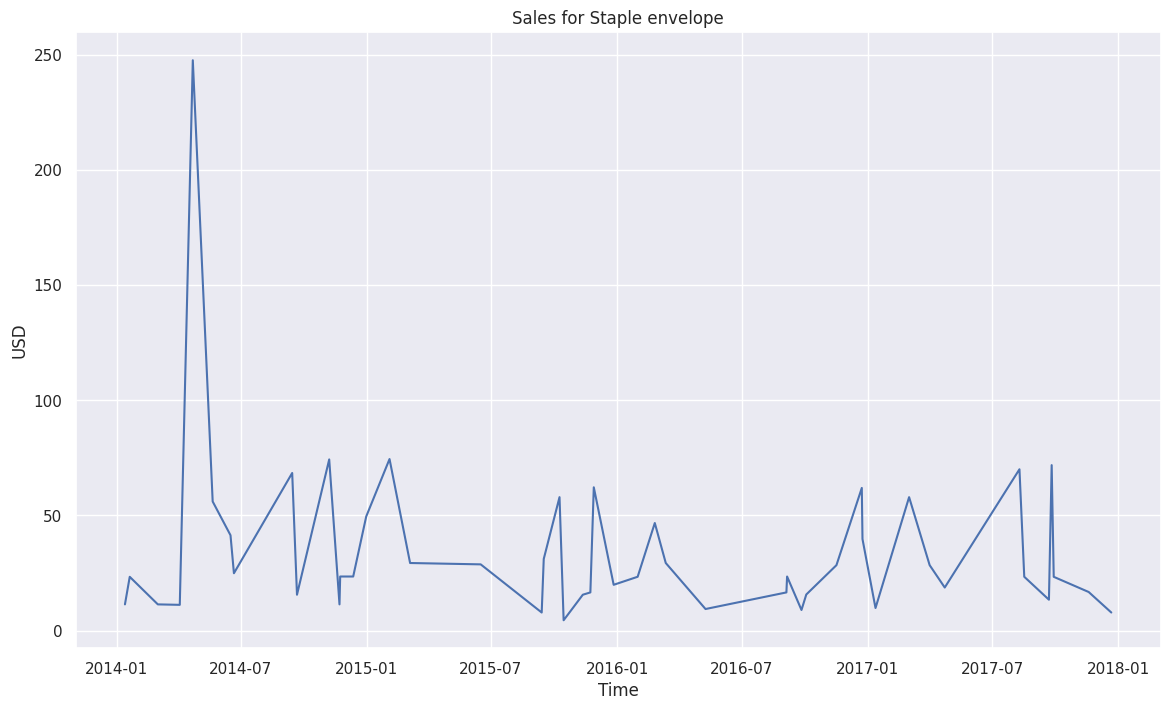

In [10]:
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.lineplot(data=by_product[by_product["Product Name"]=="Staple envelope"], x ='Order Date', y = 'Sales')
plt.ylabel('USD')
plt.xlabel('Time')
plt.title('Sales for Staple envelope')
plt.show()

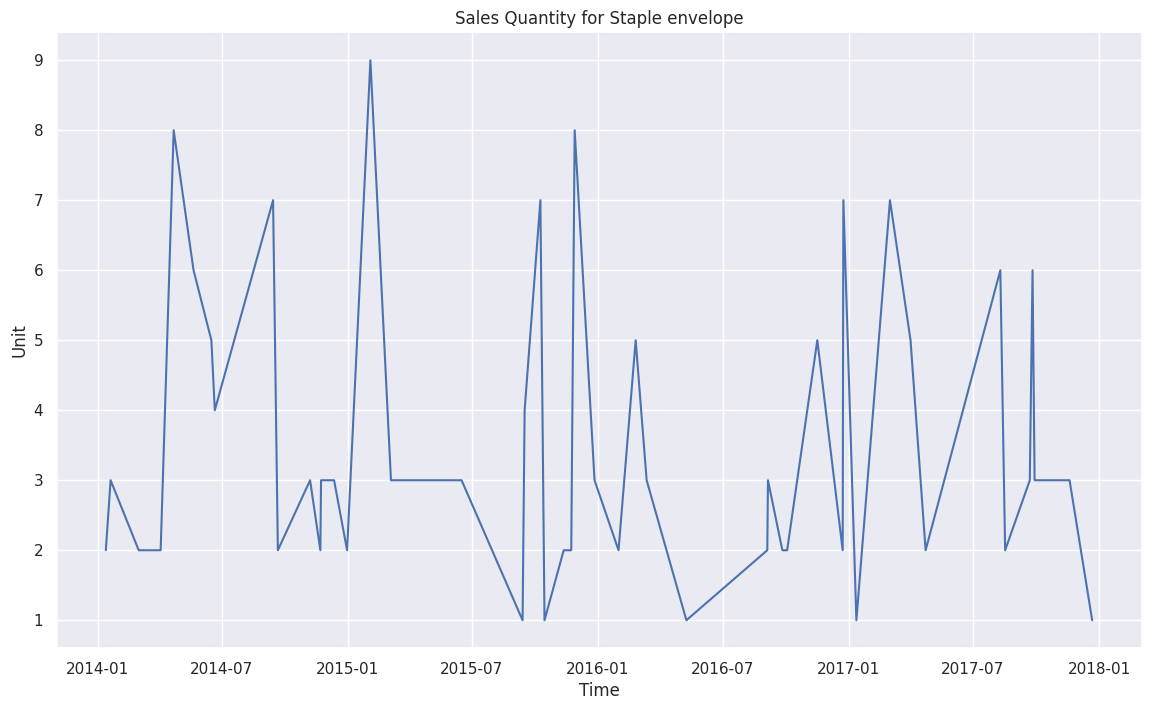

In [11]:
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=by_product[by_product["Product Name"]=="Staple envelope"], x ='Order Date', y = 'Quantity')

plt.ylabel('Unit')
plt.xlabel('Time')
plt.title('Sales Quantity for Staple envelope')
plt.show()

In [12]:

df_new = by_category[by_category["Category"]=="Office Supplies"][['Order Date', 'Sales']]
df_new['Order Date'] = pd.to_datetime(df_new['Order Date'])
df_new = df_new.groupby(pd.Grouper(key='Order Date', freq='MS')).sum().reset_index()
df_new.head(5)

,Order Date,Sales
0,2014-01-01,4851.080
1,2014-02-01,1071.724
2,2014-03-01,8605.879
3,2014-04-01,11155.074
4,2014-05-01,7135.624


In [13]:
df_new.dtypes

Order Date    datetime64[ns]
Sales                float64
dtype: object

In [14]:
time_diff1 = df_new['Order Date'].diff()
time_diff1.value_counts()

Order Date
31 days    27
30 days    16
28 days     3
29 days     1
Name: count, dtype: int64

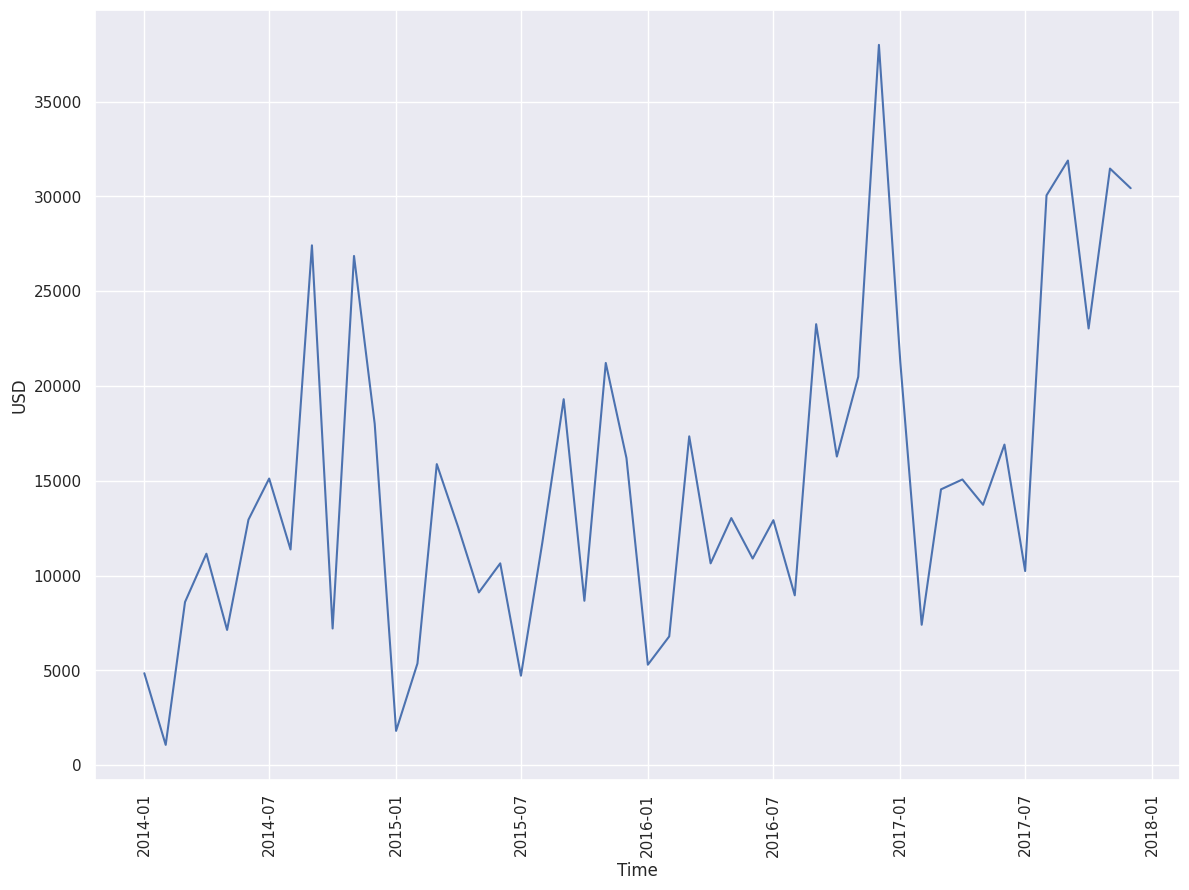

In [15]:
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.lineplot(data=df_new, x ='Order Date', y = 'Sales')
plt.ylabel('USD')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.show()

In [16]:
def generate_ar_process(lags, coefs, length):


    coefs = np.array(coefs)


    series = [np.random.normal() for _ in range(lags)]

    for _ in range(length):

        prev_vals = series[-lags:][::-1]


        new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()

        series.append(new_val)

    return np.array(series)


In [17]:
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [18]:
perform_adf_test(df_new['Sales'])

ADF Statistic: -1.905481
p-value: 0.329487


In [19]:

df_new['diff_Sales'] = df_new['Sales'].diff()

df_new = df_new.dropna()

In [20]:
df_new.tail()

,Order Date,Sales,diff_Sales
43,2017-08-01,30059.852,19818.384
44,2017-09-01,31895.843,1835.991
45,2017-10-01,23037.192,-8858.651
46,2017-11-01,31472.337,8435.145
47,2017-12-01,30436.942,-1035.395


In [21]:
perform_adf_test(df_new['diff_Sales'])

ADF Statistic: -4.308890
p-value: 0.000429


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 8.3 MB/s eta 0:00:00


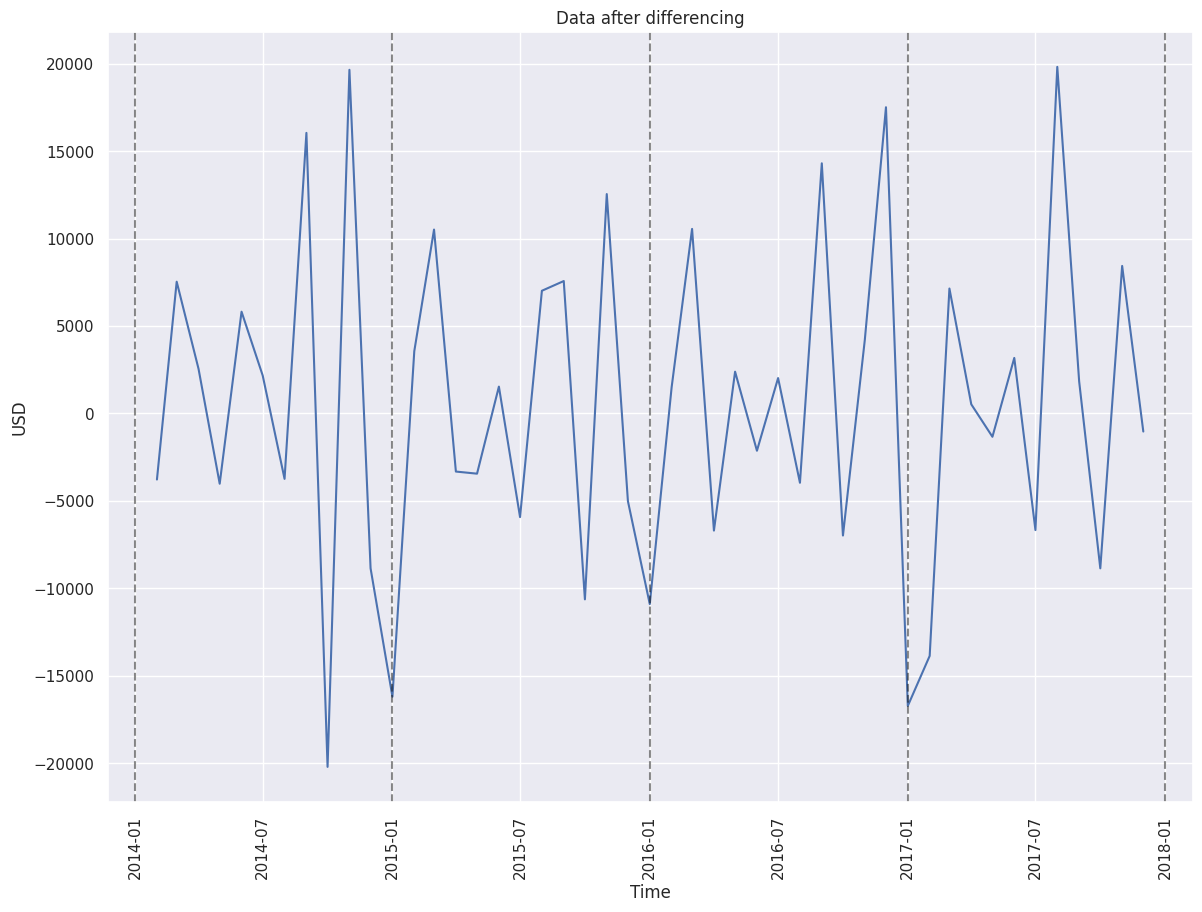

In [22]:
!pip install datetime
import datetime
sns.lineplot(data=df_new, x ='Order Date', y = 'diff_Sales')
plt.ylabel('USD')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.title("Data after differencing")
for year in range(2014,2019):
    plt.axvline(datetime.datetime(year, 1, 1), color='k', linestyle='--', alpha=0.5)
plt.show()

In [23]:
from statsmodels.tsa.seasonal import STL

df_new.set_index('Order Date', inplace=True)

In [24]:
df_new.head()

,Sales,diff_Sales
Order Date,,
2014-02-01,1071.724,-3779.356
2014-03-01,8605.879,7534.155
2014-04-01,11155.074,2549.195
2014-05-01,7135.624,-4019.450
2014-06-01,12953.037,5817.413


In [25]:
result = STL(df_new['diff_Sales'],period=12).fit()

In [26]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

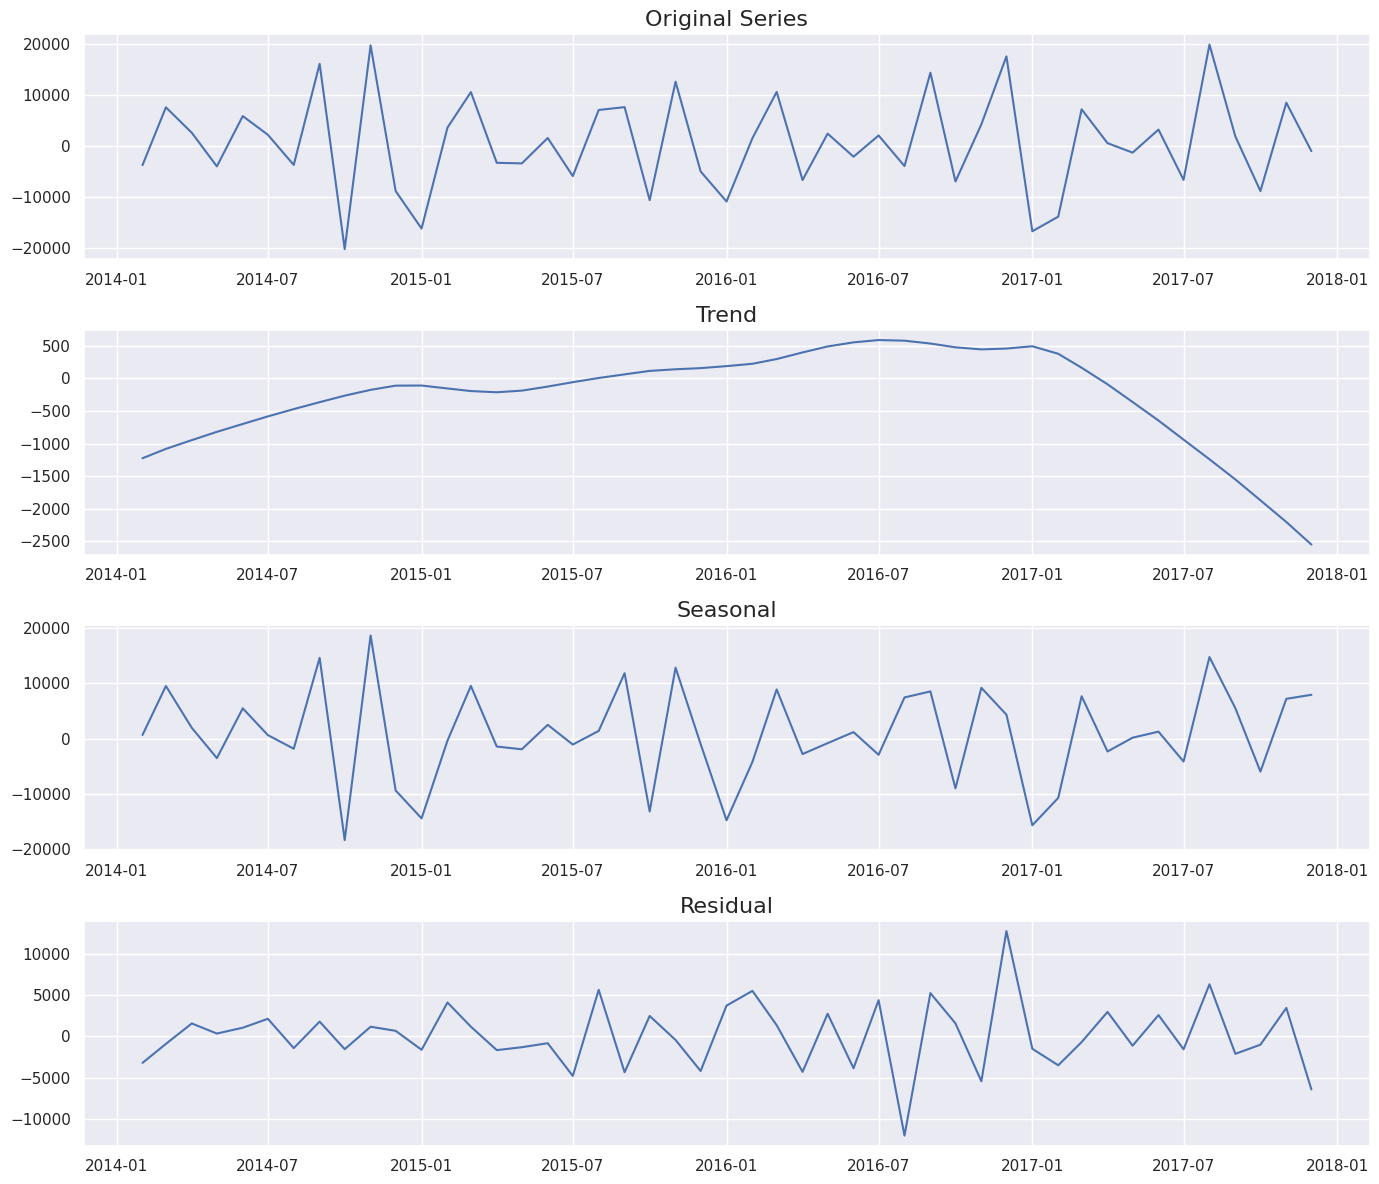

In [27]:
plt.figure(figsize=(14,12))
plt.subplot(4,1,1)
plt.plot(df_new['diff_Sales'])
plt.title('Original Series', fontsize=16)
plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)
plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)
plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)
plt.tight_layout()

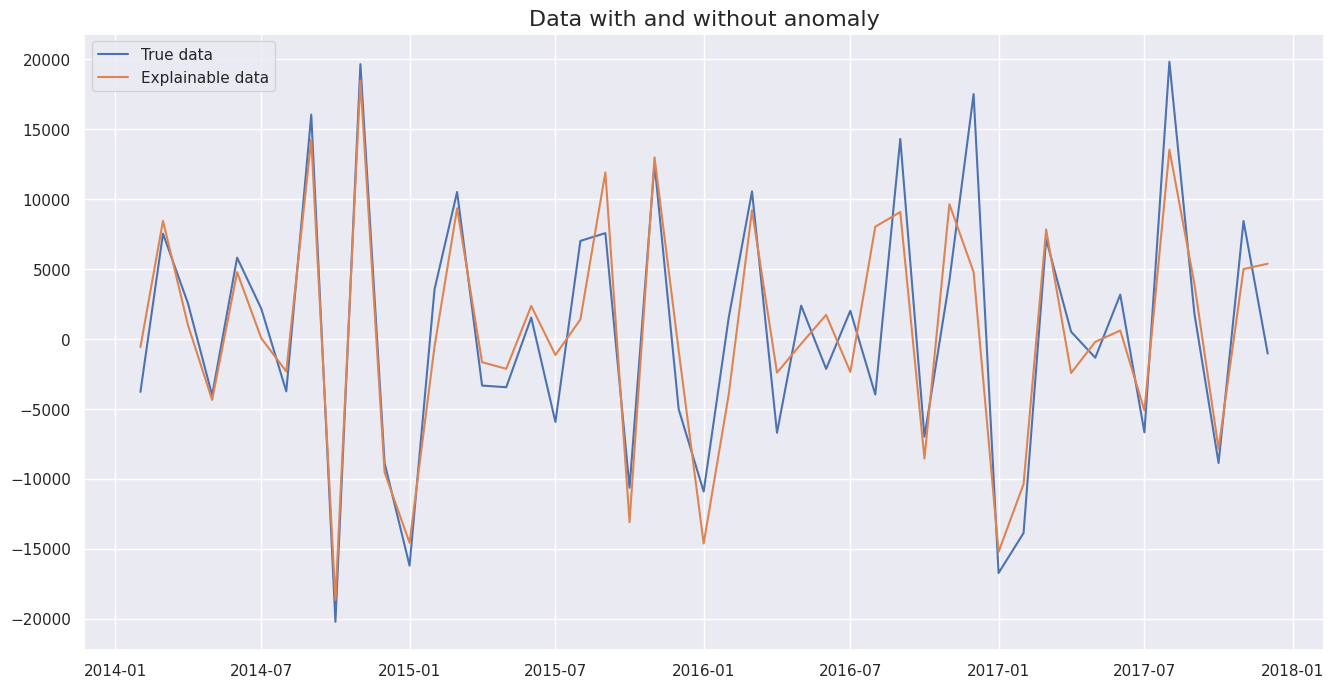

In [28]:
estimated = trend + seasonal
plt.figure(figsize=(16,8))
plt.plot(df_new['diff_Sales'],label='True data')
plt.plot(estimated,label='Explainable data')
plt.legend()
plt.title('Data with and without anomaly', fontsize=16)
plt.show()

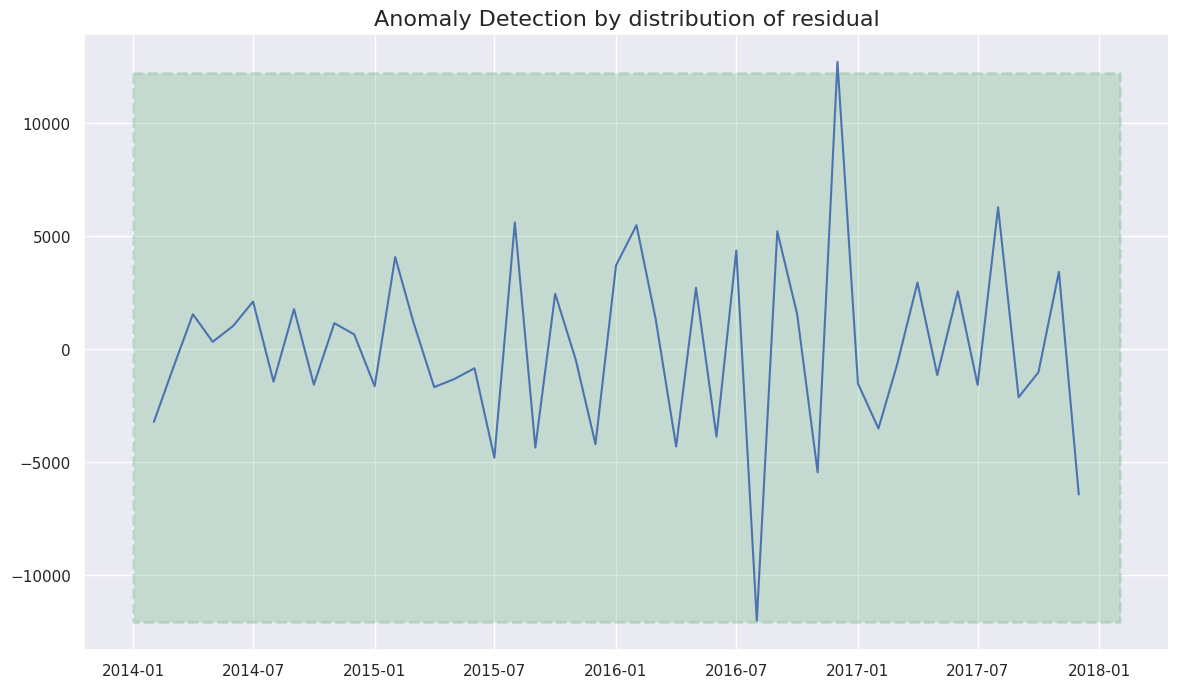

In [36]:
from datetime import datetime

resid_mu = resid.mean()
resid_dev = resid.std()
lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

plt.figure(figsize=(14,8))
plt.plot(resid)
plt.title('Anomaly Detection by distribution of residual', fontsize=16)
plt.fill_between([datetime(2014,1,1), datetime(2018,2,1)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)

In [30]:

anomalies = df_new[(resid < lower) | (resid > upper)]

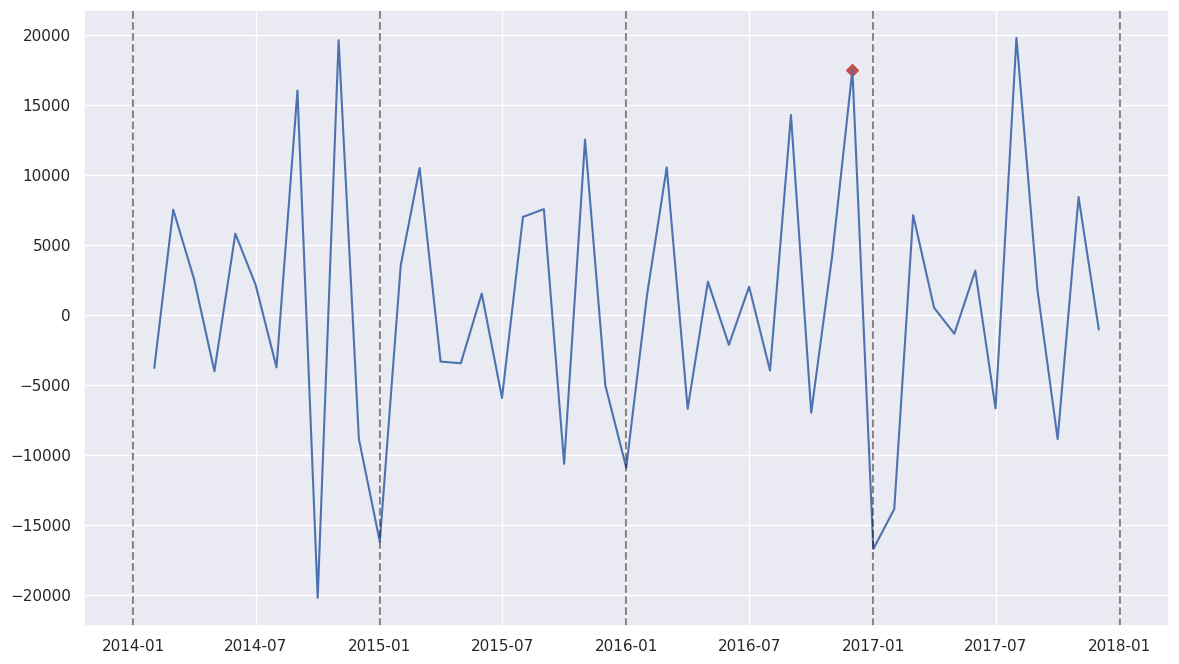

In [31]:
import datetime as dt
plt.figure(figsize=(14,8))
plt.plot(df_new['diff_Sales'])
for year in range(2014,2019):
    plt.axvline(datetime.datetime(year, 1, 1), color='k', linestyle='--', alpha=0.5)
plt.scatter(anomalies.index, anomalies.diff_Sales, color='r', marker='D')

In [32]:
anomalies

,Sales,diff_Sales
Order Date,,
2016-12-01,37997.566,17510.288


Text(0.5, 1.0, 'Residual')

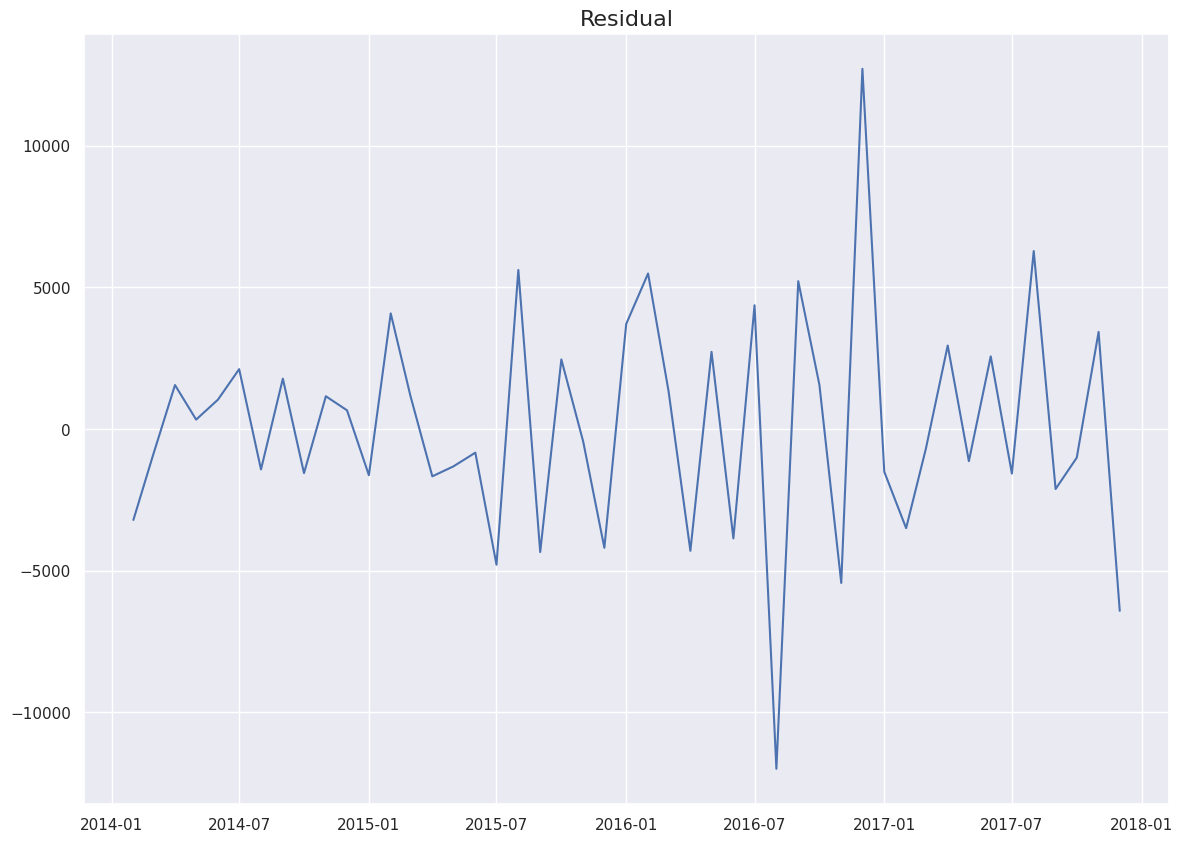

In [33]:
plt.plot(resid)
plt.title('Residual', fontsize=16)

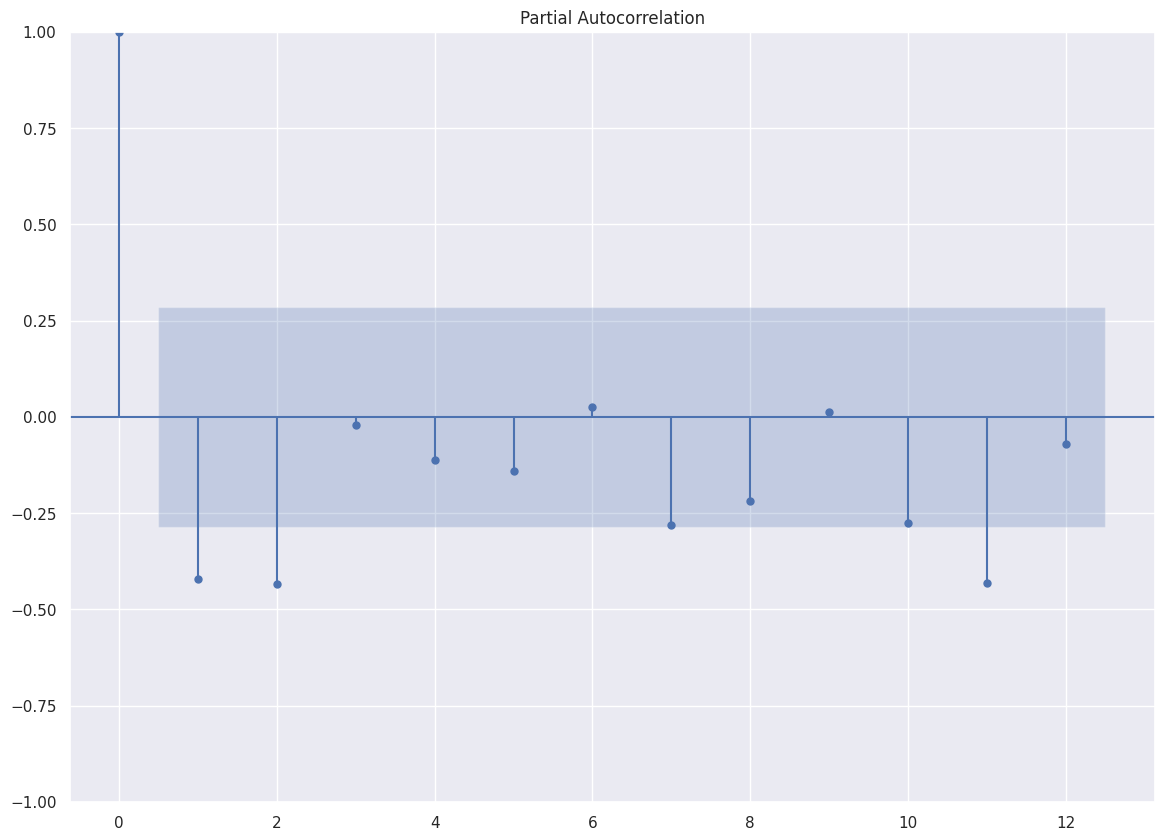

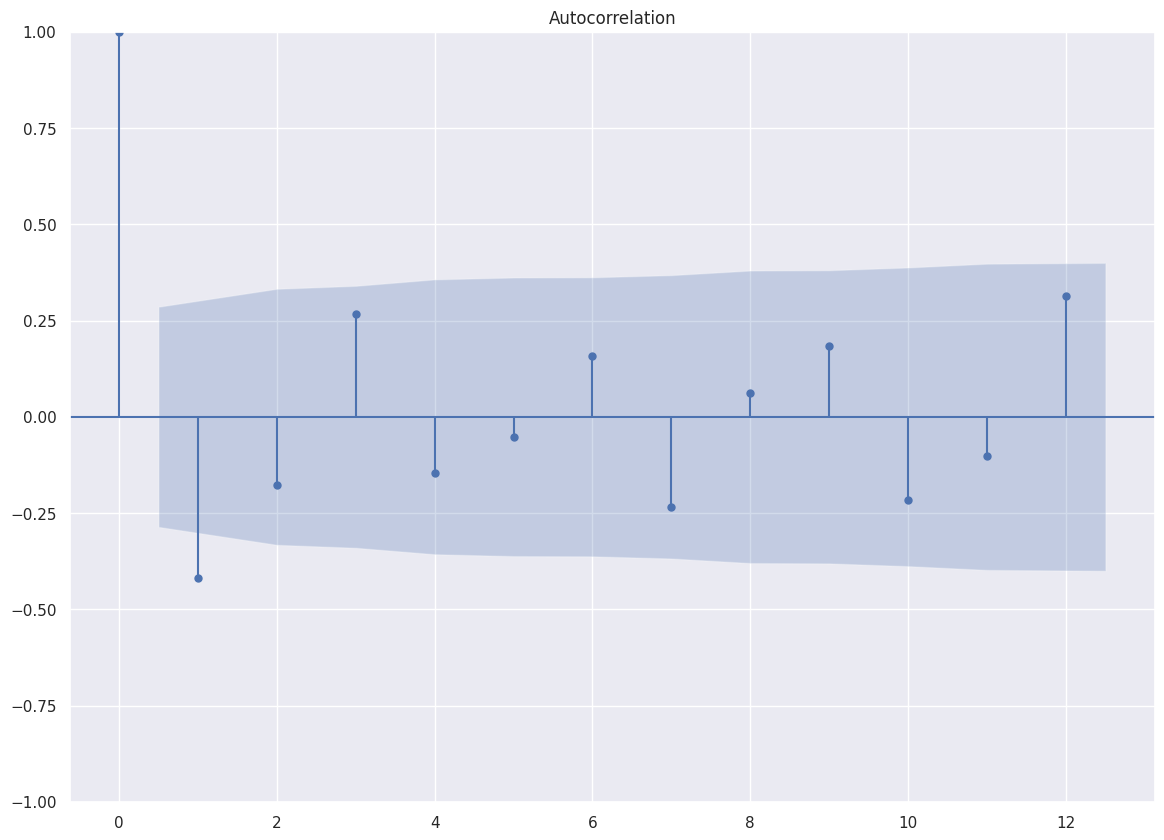

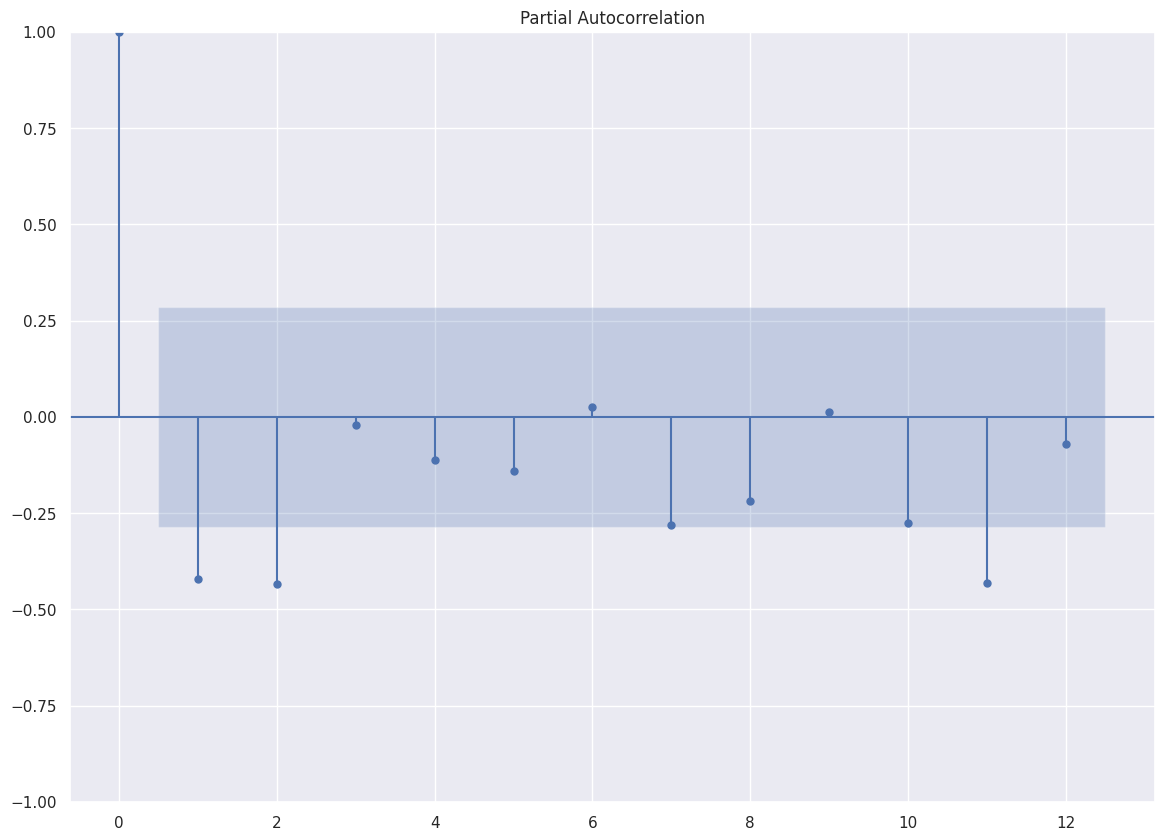

In [37]:
!pip install statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

plot_acf(df_new.diff_Sales, lags=12)
plot_pacf(df_new.diff_Sales, lags=12, method="ols")

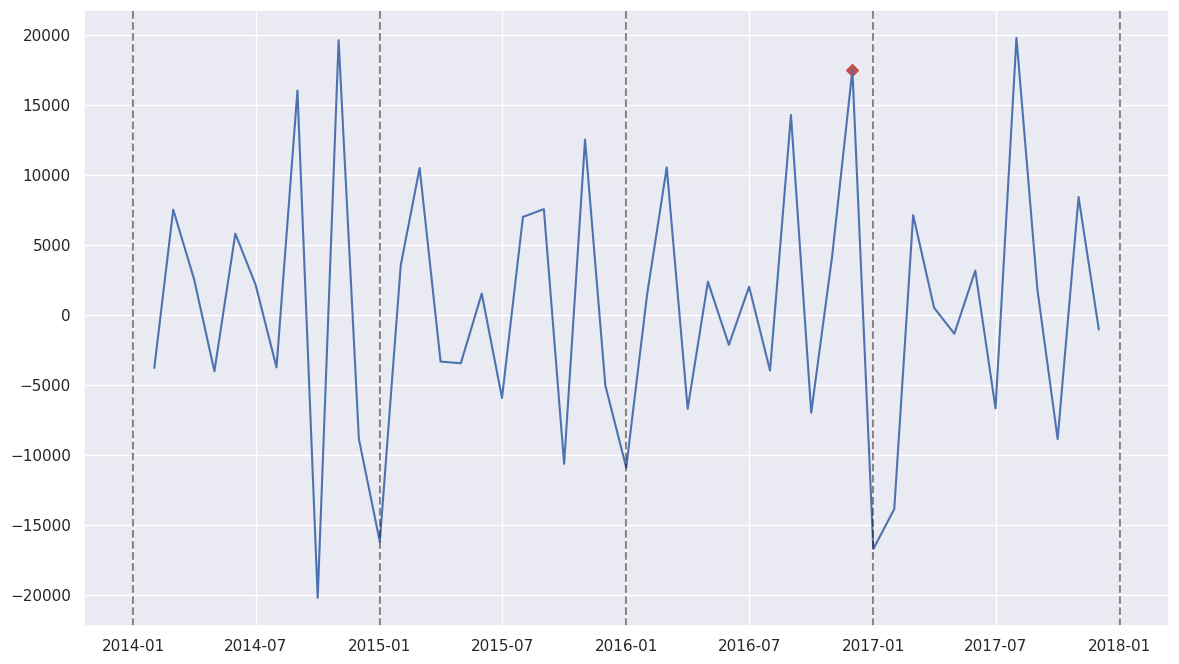

In [42]:
from datetime import datetime
import datetime as dt
import datetime

plt.figure(figsize=(14,8))
plt.plot(df_new['diff_Sales'])
for year in range(2014,2019):
    plt.axvline(datetime.datetime(year, 1, 1), color='k', linestyle='--', alpha=0.5)
plt.scatter(anomalies.index, anomalies.diff_Sales, color='r', marker='D')

In [41]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC

        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = sm.tsa.ARIMA(exog, order=order).fit()
        except:
            continue

        aic = model.aic
        results.append([order, model.aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [45]:
!pip install itertools
import itertools
from tqdm import tqdm_notebook
!pip install tqdm
ps = range(0, 10, 1)
d = 1
qs = range(0, 10, 1)
# Create a list with all possible combination of parameters
parameters = itertools.product(ps,qs)
parameters_list = list(parameters)
order_list = []
for each in parameters_list:
    each = list(each)
    each.insert(1, d) # insert d in the second position
    each = tuple(each) # convert to tuble
    order_list.append(each)

result_df = optimize_ARIMA(order_list, exog=train_data['Sales'])
result_df


ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools


<ipython-input-41-e84239d5713e>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

,"(p, d, q)",AIC
0,"(2, 1, 0)",7.108876e+02
1,"(0, 1, 1)",7.111792e+02
2,"(0, 1, 2)",7.124042e+02
3,"(1, 1, 1)",7.128363e+02
4,"(3, 1, 0)",7.128879e+02
...,...,...
93,"(9, 1, 8)",1.980385e+13
94,"(7, 1, 8)",1.980385e+13
95,"(8, 1, 7)",1.980385e+13
96,"(6, 1, 7)",1.980385e+13


In [46]:
best_model = sm.tsa.ARIMA(train_data['Sales'], order=(2,1,0)).fit()
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   35
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -352.444
Date:                Thu, 09 May 2024   AIC                            710.888
Time:                        10:12:11   BIC                            715.467
Sample:                    02-01-2014   HQIC                           712.449
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7021      0.159     -4.428      0.000      -1.013      -0.391
ar.L2         -0.4257      0.157     -2.713      0.007      -0.733      -0.118
sigma2      5.851e+07   4.15e-10   1.41e+17      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [47]:
df_new['ARIMA'] = best_model.predict(start=train_end, end=test_end)

<function matplotlib.pyplot.show(close=None, block=None)>

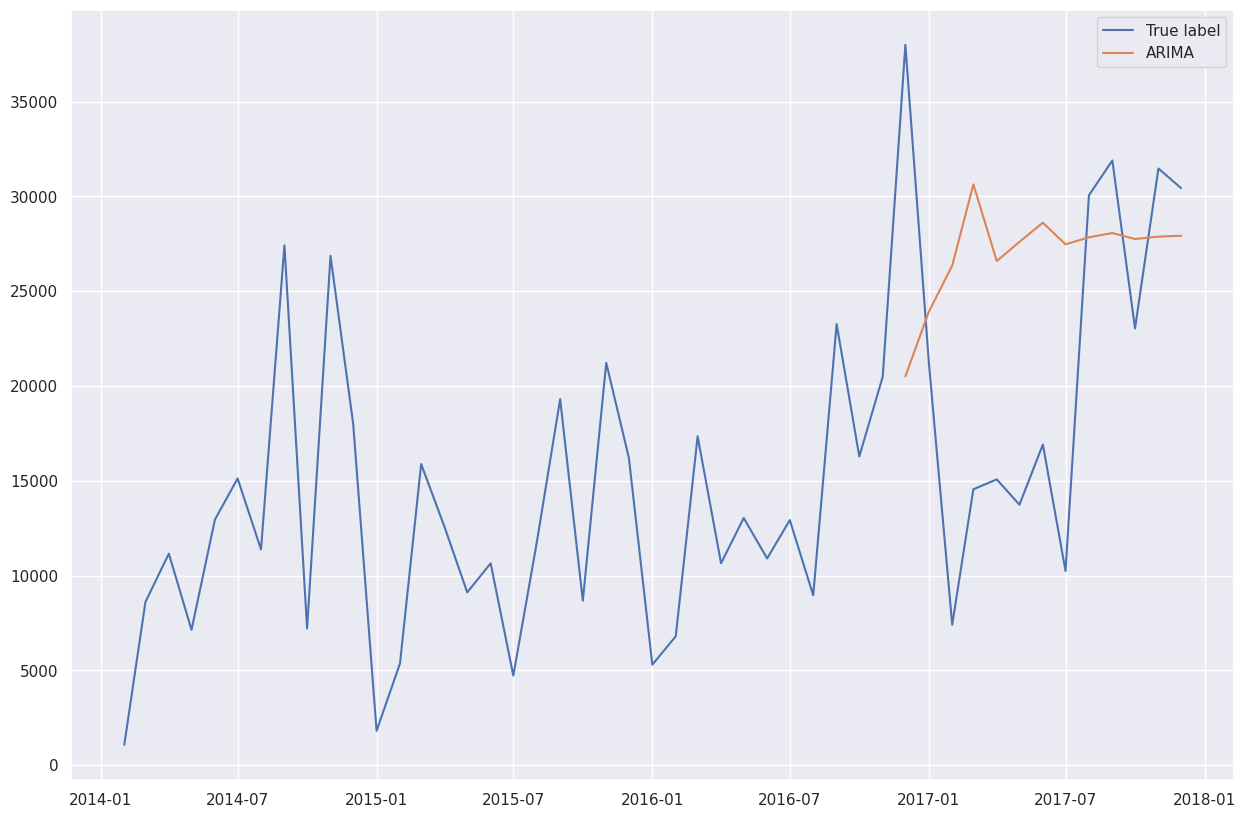

In [48]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df_new['Sales'],label='True label')
plt.plot(df_new['ARIMA'],label='ARIMA')
plt.legend()
plt.show

In [50]:
import numpy as np
print('Mean Absolute Percent Error for ARIMA:', round(np.mean(abs((df_new.loc[df_new.index>train_end,'Sales']-df_new.loc[df_new.index>train_end,'ARIMA'])/df_new.loc[df_new.index > train_end,'Sales']))*100,4),'%')

Mean Absolute Percent Error for ARIMA: 71.076 %


In [51]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE

        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """

    results = []

    for param in tqdm_notebook(parameters_list):
        try:
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue

        aic = model.aic
        results.append([param, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [54]:
import pandas as pd
import itertools
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 4
parameters = itertools.product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [55]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE

        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """

    results = []

    for param in tqdm_notebook(parameters_list):
        try:
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue

        aic = model.aic
        results.append([param, aic])

    # Check if any results were obtained
    if not results:
        raise ValueError("No valid parameters found for SARIMAX model.")

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_

In [60]:
!pip install statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX

best_SARIMA = SARIMAX(train_data['Sales'], order=(1, 1, 2), seasonal_order=(0, 1, 3, 4)).fit()
print(best_SARIMA.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                         SARIMAX Results                                         
Dep. Variable:                                     Sales   No. Observations:                   35
Model:             SARIMAX(1, 1, 2)x(0, 1, [1, 2, 3], 4)   Log Likelihood                -304.085
Date:                                   Thu, 09 May 2024   AIC                            622.170
Time:                                           10:35:56   BIC                            631.979
Sample:                                       02-01-2014   HQIC                           625.308
                                            - 12-01-2016                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7501      0.255      2.939      0.003    

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [61]:
df_new['SARIMAX'] = best_SARIMA.predict(start=train_end, end=test_end)

<function matplotlib.pyplot.show(close=None, block=None)>

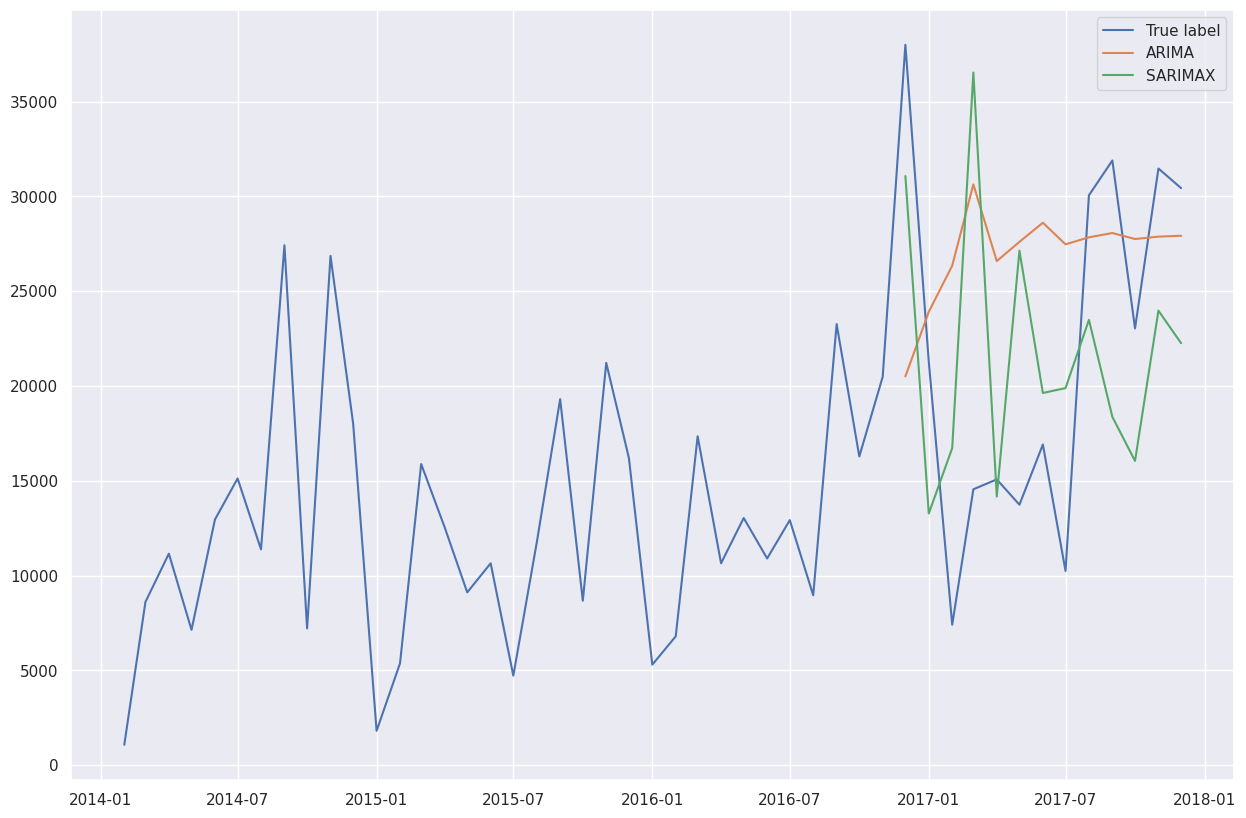

In [62]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df_new['Sales'],label='True label')
plt.plot(df_new['ARIMA'],label='ARIMA')
plt.plot(df_new['SARIMAX'],label='SARIMAX')
plt.legend()
plt.show

In [63]:
print('Mean Absolute Percent Error for SARIMAX:', round(np.mean(abs((df_new.loc[df_new.index>train_end,'Sales']-df_new.loc[df_new.index>train_end,'SARIMAX'])/df_new.loc[df_new.index > train_end,'Sales']))*100,4),'%')

Mean Absolute Percent Error for SARIMAX: 56.1355 %


In [ ]:
from google.colab import drive
drive.mount('/content/drive')